# <font size=5><span id="12"> 第十二讲 NumPy</span></font>
- 本讲预计讲2周

<span id="mulu"><font face="黑体" size=6>本章目录</font></span>
* [第十二讲 NumPy模块介绍:](#12)

    * [12.1 初识 NumPy](#12.1)
        
    * [12.2 理解 Python 和 NumPy 的数据类型](#12.2)
    
    * [12.3 NumPy 数组基础](#12.3)

    * [12.4 NumPy 数组计算 —— 通用函数](#12.4)

    * [12.5 数组计算之聚合函数aggregates](#12.5)

    * [12.6 数组计算之广播(Broadcasting)](#12.6)

    * [12.7 布尔数组和掩码](#12.7)

    * [12.8 花式索引（fancy indexing）](#12.8)

    * [12.9 排序](#12.8)

    * [12.10 NumPy的结构化数据](#12.10)



## <font size=5><span id="12.1"> 12.1 初识 NumPy</span></font>

### 12.1.1  为什么会有 NumPy？

- 在Python中，采用容器加载、保存和处理数据

- Python的array模块，array对象和列表不同，直接保存数值，和C语言的一维数组比较类似  
 但是由于它`不支持多维`，也`没有各种运算函数`，因此也不适合做数值运算。
- 高效的贮存和处理数组，对于数据科学是至关重要的

#### 答案：为了高效率！

### 12.1.2  明白 NumPy 的特点和优势

- NumPy (*Numerical Python* 的简称)提供了贮存和操作数据的接口
- NumPy 数组类似于Python的内置``list``类型，但更高效
- 特别在处理大数据时，优势显著

#### NumPy 数组成为 Python 环境下数据科学工具的核心！

- 值得花时间钻研学习

### 12.1.3   NumPy 模块的导入方式

In [1]:
import numpy
numpy.__version__

'1.26.4'

目前：NumPy的推荐版本，1.26 或更新，通常人们习惯导入NumPy并简称``np``。  
<https://numpy.org/>

In [3]:
import numpy as np

### 12.1.4    获得帮助 —— NumPy 的内置文档

- 显示 NumPy 命名域的全部内容

```ipython
In [3]: np.<TAB>
```

- 显示 NumPy 内置文档

```ipython
In [4]: np?
```

获得手册指南，点[链接](http://www.numpy.org)。

In [5]:
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'WRAP',
 '_CopyMode',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_builtins',
 '_distributor_init',
 '_financi

In [8]:
np.arccos?

Call signature:  np.arccos(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'arccos'>
File:            c:\programdata\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:      
arccos(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Trigonometric inverse cosine, element-wise.

The inverse of `cos` so that, if ``y = cos(x)``, then ``x = arccos(y)``.

Parameters
----------
x : array_like
    `x`-coordinate on the unit circle.
    For real arguments, the domain is [-1, 1].
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
   

[返回目录](#mulu)

## <font size=5><span id="12.2"> 12.2 理解 Python 和 NumPy 的数据类型</span></font>

### 12.2.1   数据的结构与处理

- Python 语言是如何处理数据的？
- NumPy 是如何改进 Python 的？

静态语言（C或Java）需要对变量显式声明，动态语言 Python 不须这样做，例如

```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

等效的 Python 代码是

```python
# Python 代码
result = 0
for i in range(100):
    result += i
```

注意主要差别
- C语言，显式声明。
- Python语言，可存放任何类型数据到任何变量，无须声明。

```python
# Python 代码
x = 4
x = "four"
```

上例，变换``x``的类型，从整型到字符串。而如果在C语言中这样操作，将引起编译错误。

```C
/* C 代码 */
int x = 4;
x = "four";  // 失败
```

这一特性，使得`如 Python 的动态类型语言更方便好用`。

In [ ]:
# python作为动态语言的体现
diverse = 123
diverse = 456.789
diverse = (1,2,3)
diverse = [1,2,3]
diverse = [1,2,[4,5]]
diverse = {1,2,3,4,5}
diverse = {1:"one", 2:"two"}
diverse = "变变变"

### 12.2.2   Python 中的整数不限于是单纯的整数

标准Python是C语言实现，所有的对象都是C结构，除值以外，还有其它信息。

例如，``x = 10000``, ``x``并不是一个单纯的数，而是一个指向C结构的指针。


查看Python 3.4源代码，可以发现integer (long) 类型有如下定义：

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

单个整数在Python 3.4中包含了四个属性：

- ``ob_refcnt``, 引用数，用于内存管理
- ``ob_type``, 用于变量类型编码
- ``ob_size``, 数据成员大小size
- ``ob_digit``, 实际整数值

下图是C语言的整数和Python语言整数的区别

![Integer Memory Layout](images/chapter12/cint_vs_pyint.png)

这里，``PyObject_HEAD``是C结构中的部分，包含前述引用计数、类型编码等信息

#### 差别：

- C整数本质上是一内存标识，其字节内容是编码了的整数值
- Python整数是一指针，指向内存中的一包含前述信息的结构对象
 <img src="images/chapter12/ch12_01.jpg" width=500 >   

Python整数的上述特点使得它

- 可以动态自由地生成
- 产生额外开销

### 12.2.3   Python中的列表不限于是单纯的列表

- 如 range 函数

In [193]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [194]:
type(L[0])

int

In [195]:
#类似地，字符串列表
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [196]:
type(L2[0])

str

### 12.2.4  Python的灵活性 —— 动态类型和异质列表

由于Python支持动态类型，甚至可以创建异质列表

In [197]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

#### 为灵活性所付出的代价

- 列表中的每一元素项都要包含引用计数等信息，即，``元素项包含除值以外的信息``
- 特别，当所有的变量类型相同（<font color="red">同质</font>）时，将`产生冗余信息`，不如存贮固定类型数组来得有效

#### 对比图

动态类型列表和固定类型数组的差别，如下图

<img src="images/chapter12/array_vs_list.png" width=500>
$$paython的list与numpy的array的存储方式$$

<img src="images/chapter12/list_vs_np.jpg">
$$向量 Vector 或者一维向量 1D array$$

- Python列表包含一指针指向一指针块，块中的每一个都指向一Python对象
- Python列表的灵活性源于每一元素都是一完全的含有数据和类型信息的结构
- 固定类型的NumPy数组没有上述灵活性，但是存贮和处理数据方面却`更有效率`

### 12.2.5  Python 进行了弥补 —— 固定类型的一维数组 array

- 内建的``array``模块 (Python 3.3版以后支持) 可用于创建单一类型的数组
- 在实现层面，Python 数组 array包含一指针指向内存中的连续区域

In [198]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#这里``'i'``是类型码，表示整数
len(A)

|Type code  |    C Type  |   Minimum size in bytes|
| --- | --- | --- |
|     'b' |  signed integer      |     1|
|     'B' |   unsigned integer   |     1|
|     'u' |   Unicode character   |      2| 
|     'h' |   signed integer     |      2|
|     'H' |   unsigned integer   |      2|
|     'i' |   signed integer    |       2|
|     'I' |   unsigned integer  |       2|
|     'l' |   signed integer   |        4|
|     'L' |   unsigned integer |        4|
|     'q' |   signed integer  |         8| 
|     'Q' |   unsigned integer|         8 |
|     'f' |   floating point |          4|
|     'd'    floating point |          8|


### 12.2.6    NumPy 提供更为实用高效的多维数组

- ``ndarray``对象

<img src="images/chapter12/array_01.jpg">

<img src="images/chapter12/array.jpg" width=500>
<font color=red size=6>$$内存中都是一维存储！！！$$</font>

#### (1)导入模块，惯例用简称 `np`

In [2]:
import numpy as np

#### (2) 创建数组

- 从 python 列表创建数组
- np.array()

In [200]:
# 整数数组
from_list1 = np.array([1, 4, 2, 5, 3])
from_list1

array([1, 4, 2, 5, 3])

In [201]:
# 小数数组
from_list2 = np.array([3.14, 4, 2, 3])
from_list2

array([3.14, 4.  , 2.  , 3.  ])

In [204]:
# 元组
from_tuple = np.array((1,2,3))
from_tuple, type(from_tuple)

(array([1, 2, 3]), numpy.ndarray)

In [203]:
# 字符列表
a = np.array(['a', 'b', 'c'])
type(a)

numpy.ndarray

In [ ]:
a

In [6]:
# 数据类型不一的列表
a = np.array(['a', 1, 'abcdefghijk', 1.1234])
type(a)

numpy.ndarray

In [8]:
a

array(['a', '1', 'abcdefghijk', '1.1234'], dtype='<U32')

In [9]:
# 嵌套列表 ?
a = np.array(['a', [1,2]])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [212]:
# 嵌套列表 
a = np.array([[1,2], 
              [3,4]])
a

array([[1, 2],
       [3, 4]])

#### (3)类型指定

使用``dtype``关键字，显式设置数据类型

In [10]:
np.array([1, 2, 3, 4], dtype='float32')

array([1, 2, 3, 4])

In [ ]:
#不同于Python列表，NumPy数组可显式设为多维

In [214]:
# 嵌套列表，产生多维数组
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [15]:
#内层列表被当成二维数组的行
a = np.array([range(i, i + 3) for i in [2, 4, 6]])
print(a)
a.strides

[[2 3 4]
 [4 5 6]
 [6 7 8]]


(12, 4)

In [216]:
#内层列表被当成二维数组的行
a = np.array([range(i, i + 3) for i in [2, 4, 6]], dtype='float64')
print(a)
a.strides

[[2. 3. 4.]
 [4. 5. 6.]
 [6. 7. 8.]]


(24, 8)

In [217]:
a.shape

(3, 3)

In [15]:
a = np.array([1, 2, 3, 4], dtype='float32')
a[0] = 10
a

array([10.,  2.,  3.,  4.], dtype=float32)

#### (4)内建函数创建数组
- np.zeros()
- np.ones()
- np.full()
- np.arange()
- np.linspace()
- np.eye()
- np.empty()
- np.random.???()  
- 等等

In [ ]:
import numpy as np
#dir(np.random)

使用NumPy内建函数创建数组，如下几例

- np.zeros 填充0

In [218]:
# 创建10个元素的数组，所有元素用零填充
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [219]:
# 创建10个元素的数组，所有元素用零填充
np.zeros((1,10), dtype=int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [221]:
# 创建10个元素的数组，所有元素用零填充
np.zeros((10, 1), dtype=int)  #[10, 1]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

- np.ones 填充1

In [222]:
# 创建一 3 x 5 浮点数组，各元素用填充值 1
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

- np.full 填充
    - np.full(shape, fill_value, dtype=None, order='C')

In [223]:
# 创建一 3 x 5 浮点数组，各元素用 3.14 填充值
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

- np.arange # 创建线性序列数组
    - np.arange([start,] stop[, step,], dtype=None)
    - 与内建函数 range() 相比较，有类似性

In [224]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

- np.linspace
```python
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
```

In [227]:
# 创建5个元素的浮点数组
np.linspace(0, 100, 101)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [17]:
np.linspace(0, 10, 10, endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [229]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

- np.random 功能丰富
    - np.random.random # 生成介于0和1之间的随机数
    - np.random.normal # 均值零，标准差为1
    - np.random.randint # 随机整数组
<img src="images\chapter12\np_random.jpg" width=500>

In [231]:
np.random.randint??

In [232]:
# 创建 3x3 均匀分布的数组
# 生成介于0和1之间的随机数
np.random.random((3, 3))

array([[0.25241011, 0.97572458, 0.1197632 ],
       [0.20856888, 0.23983126, 0.39034023],
       [0.61318864, 0.8603706 , 0.34645385]])

In [233]:
# 创建 3x3 正态分布的随机数组
# 均值零，标准差为1
np.random.normal(loc = 0, scale = 1, size = (3, 3)) #

array([[-0.80846432, -1.55328005,  1.09581535],
       [ 1.0034082 , -0.96307811,  0.38494418],
       [-2.10187333,  0.43009583, -0.66377698]])

In [234]:
np.random.normal(0, 1, (3, 3))

array([[-0.76175201, -0.26793866,  1.50540723],
       [ 1.04358096, -0.08576194, -1.87303454],
       [-1.32328083,  1.18421646,  0.20064575]])

In [235]:
# 创建 3x3 随机整数组
# randint(low, high=None, size=None, dtype=int)
np.random.randint(0, 10, (3, 3))

array([[5, 9, 6],
       [5, 3, 6],
       [8, 0, 7]])

- np.eye
    - np.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')

In [236]:
# 创建 3x3 单位矩阵
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [237]:
np.eye(4,k=2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [238]:
np.eye(5,3,k=-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

- np.empty(shape, dtype=float, order='C')
    - 创建未初始化数组，含三个整数
    - 填充值与内存中的内容有关 
    - 任意的值

In [239]:
a = np.empty(10)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [241]:
b = np.empty(10)
b

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [ ]:
np.empty([2, 2])

In [242]:
np.empty([2, 2],dtype='int')

array([[         0, 1072693248],
       [         0, 1072693248]])

- 创建一样大的数组
    - np.zeros_like()
    - np.ones_like()
    - np.empty_like()
    - np.full_like()
<img src="images\chapter12\np_like.jpg" width=500>

In [19]:
a = np.eye(4)
b = np.ones_like(a)
b

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [76]:
c = np.full_like(a,7)
c

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.],
       [7., 7., 7., 7.],
       [7., 7., 7., 7.]])

### 12.2.7   NumPy标准数据类型

标准NumPy数据类型见下表

创建数组时，可指定数据类型

```python
np.zeros(10, dtype='int16')
```

使用相关的NumPy对象

```python
np.zeros(10, dtype=np.int16)

| 数据类型	    | 描述|
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [21]:
a=np.ones(3)
a

array([1., 1., 1.])

In [20]:
jiech=1
for i in range(1,250): # 250
    jiech *= i
jiech

12931425043636430929283258208097473883979374870695122666991769708451294990220444837955271661484112797803714029412757731706923726851235963291164121116285127686706108960757058932872164745044027331701460534715756358279742854120700162052715040308991732261609356024659302208995277746290344229596890565019331928819396550887106602565107435228612515915110691807655963377509914810356691893020601132967149282632753928249914330639235395302195200000000000000000000000000000000000000000000000000000000000

In [22]:
a[0] = jiech

OverflowError: int too large to convert to float

In [246]:
a

array([3.80892264e+260, 1.00000000e+000, 1.00000000e+000])

[返回目录](#mulu)

## <font size=5><span id="12.3"> 12.3 NumPy 数组基础</span></font>

### 12.3.1  本节要点 —— 用实例讨论 NumPy 数组处理

- 访问数据和子数组
- 分割、重构(reshape)、合成(join)


#### 涉及一些新型数组操作

- *数组属性*： 确定 size、shape、内存开销(memory consumption)及数据类型
- *数组索引*： 获得/设置 数组元素值
- *数组的切片*： 获得/设置 小数组
- *重构数组*： 改变已知数组的构型(shape)
- *合成与分割*： 多合一、一分多

### 12.3.2   NumPy 数组属性

####  示例 —— 生成随机数组

- 三个随机数组，分别是一、二、三维
- 使用随机数生成器，预置随机种子

In [25]:
import numpy as np

np.random.seed(12345)  # 随机种子，便于重复生成  #去掉参数试试看？？

x1 = np.random.randint(10, size=6)  # 一维数组
x2 = np.random.randint(10, size=(3, 4))  # 二维数组
x1

array([2, 5, 1, 4, 9, 5])

In [26]:
x2

array([[2, 1, 6, 1],
       [9, 7, 6, 0],
       [2, 9, 1, 2]])

In [ ]:
#dir(x2)

#### 数组属性 —— ndim、shape、size

- ``ndim`` —— 维数
- ``shape`` —— 每一维的元素数
- ``size`` —— 数组元素总数

In [27]:
x3 = np.random.randint(10, size=(3, 4, 5))  # 三维数组
print("x3 =:", x3)
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
x3

x3 =: [[[6 7 7 7 8]
  [7 1 7 4 0]
  [3 5 7 3 1]
  [5 2 5 3 8]]

 [[5 2 5 3 0]
  [6 8 0 5 6]
  [8 9 2 2 2]
  [9 7 5 7 1]]

 [[0 9 3 0 3]
  [0 6 2 1 5]
  [8 6 5 1 0]
  [5 8 2 9 4]]]
x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


array([[[6, 7, 7, 7, 8],
        [7, 1, 7, 4, 0],
        [3, 5, 7, 3, 1],
        [5, 2, 5, 3, 8]],

       [[5, 2, 5, 3, 0],
        [6, 8, 0, 5, 6],
        [8, 9, 2, 2, 2],
        [9, 7, 5, 7, 1]],

       [[0, 9, 3, 0, 3],
        [0, 6, 2, 1, 5],
        [8, 6, 5, 1, 0],
        [5, 8, 2, 9, 4]]])

#### 数组属性 —— dtype

- ``dtype`` —— 数据类型

In [28]:
print("dtype:", x3.dtype)

dtype: int32


#### 数组属性 —— itemsize、nbytes

- ``itemsize`` —— 单个元素的字节数
- ``nbytes`` —— 总字节数

In [29]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


通常情况下
$$nbytes=itemsize \times size$$

### 12.3.4   数组索引：访问单个元素

与标准 Python 列表访问方式类似

- 使用方括号
- 首元素从0开始索引

<img src="images\chapter12\np_index.jpg" width=500>

In [30]:
x1

array([2, 5, 1, 4, 9, 5])

In [255]:
x1[0], x1[4]

(2, 9)

- 使用负索引值，末元素索引 -1

In [256]:
x1[-1]

5

In [257]:
x1[-2]

9

访问多维数组元素
- 使用索引元组

In [31]:
x2

array([[2, 1, 6, 1],
       [9, 7, 6, 0],
       [2, 9, 1, 2]])

In [83]:
x2[0, 0]  #单括弧

2

In [80]:
x2[2, 0]

2

In [81]:
x2[2, -1]

2

In [22]:
#修改元素值
x2[0][0] = 12   #双括弧
x2

array([[12,  1,  6,  1],
       [ 9,  7,  6,  0],
       [ 2,  9,  1,  2]])

In [263]:
x2[2, 0] = 20
x2

array([[12,  1,  6,  1],
       [ 9,  7,  6,  0],
       [20,  9,  1,  2]])

#### 牢记

- <font color="red">不同于 Python 列表，NumPy 数组的类型固定</font>

注意下例，试图在整数数组中插入一浮点数元素，元素值中的小数部分被无声息的截去！不易发现！！！

In [32]:
x1

array([2, 5, 1, 4, 9, 5])

In [33]:
x1[0] = 5.94159  # this will be truncated!
x1

array([5, 5, 1, 4, 9, 5])

In [35]:
x1[0] = '2'
x1

array([2, 5, 1, 4, 9, 5])

In [36]:
x1[0] = '2.2'
x1

ValueError: invalid literal for int() with base 10: '2.2'

In [ ]:
x1

### 12.3.5   数组切片 —— 访问子数组

- 切片，使用冒号标记
- 沿用标准 Python 列表的切片操作

``` python
x[start:stop:step]
```
如果有省略时，缺省值为：``start=0``, ``stop=``*``size of dimension``*, ``step=1``

#### 一维子数组切片

In [270]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [271]:
x[:5]  # 前五个元素

array([0, 1, 2, 3, 4])

In [272]:
x[5:]  # 索引5之后的元素

array([5, 6, 7, 8, 9])

In [273]:
x[4:7]  # 子数组

array([4, 5, 6])

In [274]:
x[::2]  # 隔一个元素，从0索引开始

array([0, 2, 4, 6, 8])

In [275]:
x[1::2]  # 隔一个元素，从1索引开始

array([1, 3, 5, 7, 9])

####  困惑：``step``为负值

- ``start``和``stop``的缺省值交换
- 倒置数组的可靠方法

In [276]:
x[::-1]  # 逆序 all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [277]:
x[5::-2]  # 从5开始，每隔一元素，逆序(reversed every other from index 5)

array([5, 3, 1])

#### 多维子数组切片

- 多个切片用逗号分隔

In [278]:
x2

array([[12,  1,  6,  1],
       [ 9,  7,  6,  0],
       [20,  9,  1,  2]])

In [279]:
x2[:2, :3]  # 2行、3列

array([[12,  1,  6],
       [ 9,  7,  6]])

In [280]:
x2[::-1, ::-1]

array([[ 2,  1,  9, 20],
       [ 0,  6,  7,  9],
       [ 1,  6,  1, 12]])

#### 访问数组的行和列

- 结合索引和分片技巧
- 采用空分片（即单个冒号）

In [281]:
print(x2[:, 0:1])  # x2的首列（first column of x2）

[[12]
 [ 9]
 [20]]


In [282]:
print(x2[0:2, :])  # x2的首行

[[12  1  6  1]
 [ 9  7  6  0]]


In [283]:
#如果是访问行，空切片可以省略，得到更紧凑的形式
print(x2[0])  # 等价于 x2[0, :]

[12  1  6  1]


In [285]:
 x2[:, 0], x2[:, 0:1]

(array([12,  9, 20]),
 array([[12],
        [ 9],
        [20]]))

### 12.3.6  子数组 —— 非拷贝视

- <font color="red">数组切片返回数据的视(views)，而不是拷贝(copies)</font>
- 而对于 Python 列表，切片返回的是拷贝

<img src="images/chapter12/viewcopy.jpg" width=500>

In [39]:
print(x2)
type(x2)

[[2 1 6 1]
 [9 7 6 0]
 [2 9 1 2]]


numpy.ndarray

#提取一 $2\times 2$ 子数组

In [40]:
x2_sub = x2[:2, :2]
print(x2_sub)
type(x2_sub)

[[2 1]
 [9 7]]


numpy.ndarray

In [35]:
#现在，修改子数组，发现原数组也变化了。

In [41]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  1]
 [ 9  7]]


In [42]:
print(x2)

[[99  1  6  1]
 [ 9  7  6  0]
 [ 2  9  1  2]]


#### <font color="red">值得关注的性质 —— 大型数组允许操作其局部子部分</font>

- 当操作大型数据集中的一部分时，可以访问或是处理其中的切片

### 12.3.7 创建数组的拷贝

- 数组视具有良好的特性
- 有时，也希望显式拷贝数组或子数组中的数据

可以利用``copy()``方法

####  浅拷贝 —— 调用拷贝方法

In [43]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  1]
 [ 9  7]]


In [44]:
#如果修改该子数组，对原数组没有影响
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  1]
 [ 9  7]]


In [45]:
print(x2)

[[99  1  6  1]
 [ 9  7  6  0]
 [ 2  9  1  2]]


### 12.3.8   数组维度重构

- 使用``reshape``方法

例如, 将1～9九个整数依次放入$3 \times 3$阵列

In [293]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### 注意

- 前后的数组size必须匹配
- 只要可能，``reshape``将采用非拷贝视，不过对于存放在非连续内存区的数组，就不再遵守这一规则

- 通常，重构模式是一维数组转换成二维矩阵
- 可以用``reshape``方法，或更容易地在切片操作中采用``newaxis``关键字
<img src="images\chapter12\reshape.jpg">

In [294]:
import numpy as np

In [58]:
x = np.array([1, 2, 3, 4, 5, 6])
x

array([1, 2, 3, 4, 5, 6])

In [52]:
x.shape

(3,)

In [54]:
# 重构行向量(row vector via reshape)
x.reshape((2, 2))

array([[1, 2],
       [3, 4]])

In [51]:
x.shape

(3,)

In [63]:
y = x.reshape((-1,3))
y

array([[1, 2, 3],
       [4, 5, 6]])

In [298]:
y[0,0] = 4
y, x

(array([[4, 2, 3]]), array([4, 2, 3]))

In [55]:
x

array([1, 2, 3, 4])

In [56]:
# 通过 newaxis 化为行向量
x[np.newaxis, :]
#解释一下np.newaxis
# np.newaxis的作用就是在这一位置增加一个一维，这一位置指的是np.newaxis所在的位置，

array([[1, 2, 3, 4]])

In [57]:
x[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
x

In [305]:
#np.newaxis相当于新插入一个轴
x.shape, x[np.newaxis, :].shape, x[:, np.newaxis].shape

((3,), (1, 3), (3, 1))

In [ ]:
# 通过 newaxis 化为列向量
x.reshape((3, 1))

In [308]:
np.arange(2,11,2)[:, np.newaxis]

array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [10]])

In [ ]:
x

In [ ]:
# 通过 newaxis，化为列向量
x[:, np.newaxis]

In [54]:
##换个例子
y = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
y

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [310]:
y[:, 1]  #这里是一个行

array([ 2,  6, 10])

In [ ]:
y[:, 1].shape  # y[:, 1] 的用法完全等同于一个行，而不是一个列，

In [311]:
#如果我索引多维数组的某一列时，返回的仍然是列的结构，一种正确的索引方式是：
y[:, 1][:, np.newaxis]

array([[ 2],
       [ 6],
       [10]])

In [55]:
y.reshape(1,12)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [56]:
y.reshape(1,12,order='F')  #order='C' order='F'  order='A'

array([[ 1,  5,  9,  2,  6, 10,  3,  7, 11,  4,  8, 12]])

### order关键字
  - order : 可选范围为{‘C’, ‘F’, ‘A’}。
  - 使用索引顺序读取数组的元素，并按照索引顺序将元素放到变换后的的数组中。如果不进行order参数的设置，默认参数为C。  
  - “C”指的是用类C写的读/索引顺序的元素，最后一个维度变化最快，第一个维度变化最慢。以二维数组为例，简单来讲就是横着读，横着写，优先读/写一行。
  - “F”是指用FORTRAN类索引顺序读/写元素，最后一个维度变化最慢，第一个维度变化最快。竖着读，竖着写，优先读/写一列。注意，“C”和“F”选项不考虑底层数组的内存布局，只引用索引的顺序。
  - “A”选项所生成的数组的效果与原数组a的数据存储方式有关，如果数据是按照FORTRAN存储的话，它的生成效果与”F“相同，否则与“C”相同。这里可能听起来有点模糊，下面会给出示例。

### 牛刀小试：如何构造一个8*8 的矩阵，类似国际象棋棋盘，阴影为1，白色为0
![Array Memory Layout](images/chapter12/chess.jpg)


In [314]:
## 思考时间====
#| 留几分钟思考
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
#|
Z = np.zeros((8, 8), dtype=int)
for i in range(8):
    for j in range(8):
        if (i+j)%2:
            Z[i,j] = 1
Z

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [91]:
np.array([i%2 for i in range(81)]).reshape((9,9))[1:9,1:9]

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [319]:
np.tile(np.array([[0,1],[1,0]]), (4,4))

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

### 12.3.9  数组连接和分割

前述操作是对单个数组，有时，可能要做

- 连接：多合一
- 分割：一分多

#### 函数 —— 用于数组的连接

连接操作要用到下列函数

- ``np.concatenate``
- ``np.vstack``
- ``np.hstack``

In [58]:
help(np.concatenate)

Help on _ArrayFunctionDispatcher in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    dtype : str or dtype
        If provided, the destination array will have this dtype. Cannot be
        provided together with `out`.
    
        .. versionadded:: 1.20.0
    
    casting : {'no', 'equiv', 'safe

#### 函数 np.concatenate 及其调用参数

``np.concatenate``用一个数组元组或列表做为第一个调用参数
<img src="images\chapter12\concatenate.jpg">

In [64]:
import numpy as np

In [65]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate((x, y)) #一维

array([1, 2, 3, 3, 2, 1])

#### 连接多于2个数组

In [66]:
z = [99, 99, 99]
print(np.concatenate([x, y, z])) #注意多个的使用方法，用中括弧合并

[ 1  2  3  3  2  1 99 99 99]


#### 二维数组的连接

In [67]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])
grid

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
# 沿第一个轴连接，注意哪一个轴是第一轴
np.concatenate([grid, grid], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [63]:
# 沿第二个轴（索引值始于0）连接，用可选参数axis
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [ ]:
# 体会一下上面两种方法的区别。

#### 堆集函数

对于固定维度的数组，使用堆集函数
- 竖向堆集``np.vstack`` (vertical stack)
- 横向堆集``np.hstack`` (horizontal stack)

可以表示得更清楚
<img src="images\chapter12\hstack_vstack.png">

In [78]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# 数组的竖向堆集
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [79]:
# 数组的横向堆集
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

类似地
- ``np.dstack``将沿第三轴进行堆集
-  等价于np.concatenate(tup,axis=2)
<img src="images\chapter12\dstack.jpg">

In [80]:
d1 = np.array([[[1,2,3],
                [4,5,6],
                [7,8,9]],
               
               [[1,2,3],
                [4,5,6],
                [7,8,9]]])
d1

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [84]:
d2 = np.array([[[1,2,3],
                [4,5,6],
                [7,8,9]],
              
              [[1,2,3],
                [4,5,6],
                [7,8,9]]])
d2

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [87]:
d3 = np.concatenate([d1, d2], axis = 2)    # 改变axis=0/1/2 不同结果
d3

array([[[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]],

       [[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]]])

In [ ]:
d3[0,1,2] = 55  #哪个数据变成 55？？？
d3[1,0,2] = 66  #哪个数据变成 55
d3[2,0,1] = 77  #哪个数据变成 55

In [102]:
d4 = np.concatenate([d3, d3], axis = 2)
d4

array([[[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]],

       [[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]],

       [[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]]])

#### 分割数组

连接的反向操作是分割，利用的函数有

- ``np.split``
- ``np.hsplit``
- ``np.vsplit``

每种方法，都要传递下标列表做为调用参数
<img src="images\chapter12\hsplit_vsplit.jpg">

In [1]:
import numpy as np

In [67]:
help(np.split)

Help on _ArrayFunctionDispatcher in module numpy:

split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays as views into `ary`.
    
    Parameters
    ----------
    ary : ndarray
        Array to be divided into sub-arrays.
    indices_or_sections : int or 1-D array
        If `indices_or_sections` is an integer, N, the array will be divided
        into N equal arrays along `axis`.  If such a split is not possible,
        an error is raised.
    
        If `indices_or_sections` is a 1-D array of sorted integers, the entries
        indicate where along `axis` the array is split.  For example,
        ``[2, 3]`` would, for ``axis=0``, result in
    
          - ary[:2]
          - ary[2:3]
          - ary[3:]
    
        If an index exceeds the dimension of the array along `axis`,
        an empty sub-array is returned correspondingly.
    axis : int, optional
        The axis along which to split, default is 0.
    
    Returns
    -------
    sub-arra

In [90]:
x = np.array([1, 2, 3, 99, 99, 3, 2, 1, 1])
a, b, c = np.split(x, [3, 7])
a, b, c

(array([1, 2, 3]), array([99, 99,  3,  2]), array([1, 1]))

#### 分割数组的注意要点

- *N* 个分割点，生成 *N+1* 个子数组
- 函数``np.hsplit``和``np.vsplit``的操作方式类似，方向不同

In [106]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [107]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [108]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


类似地，``np.dsplit``将沿第三轴分割数组

In [110]:
d3

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [115]:
a, b = np.vsplit(d3,[1])
print('a=', a)
print('b=', b)

a= [[[1 2 3]
  [4 5 6]
  [7 8 9]]]
b= [[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]]


In [ ]:
a, b = np.split(d5,[2],axis=0)  #改变一下axis = 【0,1,2】
print('a=', a)
print('b=', b)

In [ ]:
np.dsplit?


[返回目录](#mulu)

## <font size=5><span id="12.4"> 12.4 NumPy 数组计算 —— 通用函数</span></font>

### 12.4.1 NumPy 在数据计算方面的重要性

NumPy 在数据科学世界如此重要，原因在于

- 易用灵活的接口
- 优化的数据计算
- 快速的计算

实现快速高效的关键

- 在一般NumPy的 *通用函数 universal functions(ufuncs)* 中，使用 *向量化vectorized* 操作，使得大量数组元素重复计算的效率大大提高。

### 12.4.2   认识 Python 循环的缓慢

Python 常规操作的缺省实现（基于CPython）十分缓慢，原因在于

- 动态、解释型语言：类型比较灵活，但操作不能编译成高效的机器代码（如C和Fortran）

为克服此缺点，业界付出大量努力：

- [PyPy](http://pypy.org/)项目，及时编译实现Python
- [Cython](http://cython.org)项目，转换Python代码成C代码
- [Numba](http://numba.pydata.org/) 项目, 转换Python片断成LLVM(底层虚拟机,Low Level Virtual Machine)字节码

上述项目各有优劣，不过都没有超越标准CPython引擎。

#### 示例 —— 循环计算倒数

Python 的迟缓多是由于小操作的大量重复，例如，对数组元素的循环操作，考虑 *一个循环计算倒数* 的例子。

In [3]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):  #循环计算倒数的函数
    output = np.empty(len(values))  #建立一个同大小的空矩阵
    for i in range(len(values)):  #循环处理
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5) #1-10之间随机生成5个数
print('values = ',values)
compute_reciprocals(values) #计算倒数

values =  [6 1 4 4 8]


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

#### 魔法命令发现 —— 慢得令人吃惊

- 采用基准 IPython 的魔法命令``%timeit``，测量上述代码的运行时间

In [4]:
big_array = np.random.randint(1, 100, size=10**6) #有点慢哦
%timeit compute_reciprocals(big_array)

2.55 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 计算效能的解读

- 运算级别：百万
- 时间开销：数秒

#### 思考

- 手机的处理速度都到了Giga-FLOPS (即, 每秒百万次数字运算)，上例慢得离谱
- 瓶颈：不是操作本身，而是每次循环CPython必须做的类型检查、函数调用等
- 如果在C语言下，效率将大大提高

### 12.4.3    通用函数 (UFuncs) 介绍

- 对于多种操作，NumPy提供了便利接口（诸如 静态类型、编译程序等），即所谓 *向量化(vectorized)* 操作
- 可以轻松对数组运算实现到元素级
- 向量化操作的实质是在 NumPy 的 *编译层* 实现循环，从而快速执行代码

#### 示例 —— 效率对比

- 比较以下两例结果......

In [5]:
values

array([6, 1, 4, 4, 8])

In [118]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


#### 发现 —— 效率得到提高

- 对于大数组运算，执行效率比 Python 循环在量级上大幅提高

In [6]:
%timeit (1.0 / big_array)

17.2 ms ± 889 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 12.4.4   NumPy 向量化操作

通过 *通用函数 ufuncs* 来实现

#### 主要目的

- 快速执行大量重复的数组操作

#### 通用函数的极度灵活性

In [8]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

#### ufunc 操作不限于一维数组

- 多维数组也可

In [9]:
x = np.arange(9).reshape((3, 3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [10]:
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

- 使用 *向量化vectorization* 和 *通用函数ufuncs* 进行计算，几乎总是高效的，尤其对大型数组
- 无论何时，有Python脚本的类似循环计算，就有必要考虑采用 *向量化操作*

### 12.4.5   探讨 NumPy 的 UFuncs

Ufuncs 存在的两种形式：
- 一元通用函数 *unary ufuncs*，操作单个输入
- 二元通用函数 *binary ufuncs*，操作两个输入

#### 示例 —— 数组算法

- NumPy 的通用函数 ufuncs 用起来非常自然，可实现在诸如：加、减、乘、除等标准计算

In [11]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


#### 一元通用函数 (unary ufunc) 也适用于

- 取反 -
- 乘幂 **
- 取余 %

等操作符

In [12]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


#### 运算捆绑

- 普通表达式 —— 运算捆绑

In [ ]:
-(0.5*x + 1) ** 2

#### 内部包装

每个运算操作都在NumPy内部进行简易包装，例如

- ``+``操作包装成``add``函数

In [ ]:
np.add(x, 2)  # x+2

In [ ]:
#np.negative

#### 实现通用函数的运算符表

- 下表列出所有在 NumPy 中实现的运算符

| 运算符	   | 等效的通用函数     | 描述                   |
|--------------|----------------------|---------------------------------|
|``+``      |``np.add``         |相加 (例如, ``1 + 1 = 2``)     |
|``-``      |``np.subtract``      |相减 (例如, ``3 - 2 = 1``)     |
|``-``      |``np.negative``      |取负 (例如, ``-2``)          |
|``*``      |``np.multiply``      |相乘 (例如, ``2 * 3 = 6``)     |
|``/``      |``np.divide``       |相除 (例如, ``3 / 2 = 1.5``)   |
|``//``      |``np.floor_divide``   |地板除 (例如, ``3 // 2 = 1``)  |
|``**``      |``np.power``        |乘幂 (例如, ``2 ** 3 = 8``)   |
|``%``      |``np.mod``         |模除 (例如, ``9 % 4 = 1``)     |

此外，还有布尔/位运算符，略。

### 12.4.6  内建通用函数系列

#### 绝对值

- 如同Python的内建运算符，内建的绝对值函数也适用。

In [13]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

与之相应的 NumPy 通用函数(ufunc)是``np.absolute``，它也可使用假名(alias)``np.abs``

In [14]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [15]:
np.abs(x)

array([2, 1, 0, 1, 2])

该通用函数(ufunc)也可处理复数，这时所谓的绝对值也就是幅值

In [16]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

In [17]:
abs(3 - 4j)

5.0

#### 三角函数

NumPy 提供了大量的通用函数(ufuncs)，包括三角函数

考虑下例

In [18]:
theta = np.linspace(0, np.pi, 10)
theta

array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
       1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265])

计算若干三角函数值

In [19]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]
sin(theta) =  [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]
cos(theta) =  [ 1.          0.93969262  0.76604444  0.5         0.17364818 -0.17364818
 -0.5        -0.76604444 -0.93969262 -1.        ]
tan(theta) =  [ 0.00000000e+00  3.63970234e-01  8.39099631e-01  1.73205081e+00
  5.67128182e+00 -5.67128182e+00 -1.73205081e+00 -8.39099631e-01
 -3.63970234e-01 -1.22464680e-16]


#### 结果值达到机器精度！

####  反三角函数也适用

In [20]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


#### 指数和对数函数

In [21]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


对数函数也适用

- log 自然对数
- log2 以2为底
- log10 以10为底

In [22]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


<font color="red">指数和对数函数的特殊版本</font>
- 适用于小输入数

In [23]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


当``x``非常小时，这些函数的精度比原来的``np.log``或``np.exp``更高

#### NumPy 提供的特殊通用函数 (ufuncs)

NumPy 有众多通用函数可用，包括

- 双曲三角函数
- 位运算函数
- 比较运算符
- 弧度rad/度deg转换函数
- 舍入和剩余函数

In [ ]:
np.arctan2??

In [ ]:
#np.arctan(1/0)

In [ ]:
np.arctan2(1,0)

#### scipy.special 中提供的特殊通用函数
- SciPy 提供的特殊函数子模块``scipy.special``中的函数

更多的函数，无法一一列举:
https://docs.scipy.org/doc/scipy-0.17.1/reference/special.html

In [24]:
from scipy import special

In [25]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [ ]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.5, 0.7, 1.0])
#x = np.arange(0,5,0.1)
y1 = special.erf(x)
y2 = special.erfc(x)
y3 = special.erfinv(x)
print("erf(x)  =", special.erf(x))  #高斯曲线的面积,计算正态分布密度曲线,
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))


In [ ]:
# 使用之前，要查清楚函数的含义
import matplotlib as mpl
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

### 12.4.7  通用函数(Ufunc)的高级特性

- 指定输出
- 使用数组视(array views)

#### 指定输出

- 对大型计算，指定存放结果的数组是有用的
- 相比创建临时数组，更可能采用将结果直接写入内存的办法
- 对所有的 ufuncs，可以采用``out``参数指定输出

In [10]:
x = np.arange(5)
print('x=',x)
y = np.empty(5)
print('y=',y)
np.multiply(x, 10, out=y)  #np.multiply  数组和矩阵对应位置相乘，输出与相乘数组/矩阵的大小一致
# 输出到y去
print(y)
# y的大小要对应，如果不对应，会出错

x= [0 1 2 3 4]
y= [16.  8.  4.  2.  1.]
[ 0. 10. 20. 30. 40.]


#### 使用数组视(array views)

In [7]:
y = np.zeros(10)
np.power(2, x, out=y[::-2])  #仔细想一想，这是什么意思
print(y)

[ 0. 16.  0.  8.  0.  4.  0.  2.  0.  1.]


- 对于上述小算例，可采用 ``y[::-2] = 2 ** x``，影响不大。
    - 创建一临时数组存贮结果``2 ** x``
    - 然后将之拷贝到``y``数组
- 对于大型数组计算，宜采用 ``out``参数
    - 直接操作 `y`
    - 将节省内存

[返回目录](#mulu)

## <font size=5><span id="12.5"> 12.5 数组计算之聚合函数aggregates</span></font>

### 12.5.1 聚合 : 最大值, 最小值和中间值

对于大数据，首先要概算统计量。

最常见的统计量是均值与标准差，借此，可以归纳出数据集的典型值，另外一些聚合值也有用（和、积、中值、最小和最大、分位数等）

NumPy有快速内建的聚合函数，下面讨论。

### 12.5.2 数组求和

In [7]:
import numpy as np

In [8]:
L = np.random.random(10000)
print("L=",L)
sum(L)

L= [0.25241011 0.97572458 0.1197632  ... 0.41573718 0.08086468 0.02903943]


4988.857592881709

语法类似于 NumPy 的``sum``函数，返回值也一样。

In [36]:
np.sum(L)

4988.857592881716

由于运行的是编译代码，NumPy 的操作将很快。

In [120]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

164 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
245 µs ± 3.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 12.5.3 最小值和最大值

类似地，Python 也有内建的 ``min`` 和 ``max`` 函数，用于求任意数组的最小和最大值

In [ ]:
min(big_array), max(big_array)

NumPy 的相关函数有类似的语法，并且运行速度更快

In [ ]:
np.min(big_array), np.max(big_array)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

对于 ``min``, ``max``, ``sum``, 等若干 NumPy 聚合，有更短的调用语法：

In [125]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500222.4725885841


### 12.5.4 多维聚合

假设有一二维数组，最常用的计算是针对行和列实施

In [9]:
M = np.random.random((3, 4))
print(M)

[[0.79052915 0.977284   0.31316845 0.72406328]
 [0.42954113 0.94408442 0.57395283 0.56403008]
 [0.03868658 0.59359849 0.72510428 0.62071996]]


缺省时，每个 NumPy 聚合函数将返回整个数组的聚合

In [12]:
M.sum(axis=0)

array([1.25875685, 2.51496691, 1.61222556, 1.90881331])

聚合函数有一附加的参数，用于指定沿其计算的轴 *axis*，例如，计算每一列的最小值，就设置 ``axis=0``：

In [42]:
M.min(axis=0)

array([0.38181357, 0.10388063, 0.31217011, 0.39751993])

函数返回了4个值，对应着4列。

类似地，也可计算每行的最大值。

In [43]:
M.max(axis=1)

array([0.67758513, 0.99127075, 0.77801784])

指定轴的方式有可能引起困惑。

关键字 ``axis`` 指定数组的某坍缩维 (*dimension of the array that will be collapsed*)，而不是返回的维。

如，指定 ``axis=0`` 意指第一个轴将坍缩，对于二维数组，这即是指每列的值将产生。

### 12.5.5 其它聚合函数

NumPy 还提供其它许多聚合函数，这里不详谈。

绝大多数聚合函数是 NaN 安全的.

如下表给出了 NumPy 中可用的聚合函数


|函数名           |   NaN-安全版本     | 描述                                 |
|----------------------|-----------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | 计算元素之和                       |
| ``np.prod``       | ``np.nanprod``      | 计算元素之积                  |
| ``np.mean``       | ``np.nanmean``      | 计算元素的均值                      |
| ``np.std``        | ``np.nanstd``       | 计算标准差                    |
| ``np.var``        | ``np.nanvar``       | 计算方差                              |
| ``np.min``        | ``np.nanmin``       | 寻找最小值                           |
| ``np.max``        | ``np.nanmax``       | 寻找最大值                            |
| ``np.argmin``      | ``np.nanargmin``     | 寻找最小值的下标                   |
| ``np.argmax``      | ``np.nanargmax``     | 寻找最大值的下标                  |
| ``np.median``      | ``np.nanmedian``     | 计算元素的中值                   |
| ``np.percentile``   | ``np.nanpercentile``  | 计算元素的各阶统计量     |
| ``np.any``        | N/A              | 测试是否有任一元素为真        |
| ``np.all``        | N/A              | 测试是否所有元素为真       |

后面将不时讨论这些聚合函数

In [13]:
M = np.random.random((3, 4))
print(M)
M[1,1] = 'NaN'  #值缺失
print(M)

[[0.58265317 0.54624557 0.18769267 0.74205417]
 [0.76440978 0.4524221  0.16069788 0.03359573]
 [0.67758513 0.3737529  0.48661734 0.46233732]]
[[0.58265317 0.54624557 0.18769267 0.74205417]
 [0.76440978        nan 0.16069788 0.03359573]
 [0.67758513 0.3737529  0.48661734 0.46233732]]


In [15]:
#M = np.random.random((3, 4))
# np.max(M)
np.nanmax(M)

0.7644097826510612

### 12.5.6 示例：美国总统的平均身高如何?

#### 示例：考虑所有美国总统的身高

数据见文件 *president_heights.csv*

In [16]:
#!head -4 data/president_heights.csv
!type .\data\president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173
10,John Tyler,183
11,James K. Polk,173
12,Zachary Taylor,173
13,Millard Fillmore,175
14,Franklin Pierce,178
15,James Buchanan,183
16,Abraham Lincoln,193
17,Andrew Johnson,178
18,Ulysses S. Grant,173
19,Rutherford B. Hayes,174
20,James A. Garfield,183
21,Chester A. Arthur,183
23,Benjamin Harrison,168
25,William McKinley,170
26,Theodore Roosevelt,178
27,William Howard Taft,182
28,Woodrow Wilson,180
29,Warren G. Harding,183
30,Calvin Coolidge,178
31,Herbert Hoover,182
32,Franklin D. Roosevelt,188
33,Harry S. Truman,175
34,Dwight D. Eisenhower,179
35,John F. Kennedy,183
36,Lyndon B. Johnson,193
37,Richard Nixon,182
38,Gerald Ford,183
39,Jimmy Carter,177
40,Ronald Reagan,185
41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185


#### ``Pandas``  开放的数据分析模块

- 仅介绍如何采用 ``Pandas`` 包来读取文件数据
- 更一般的有关 Pandas 内容将不在课内介绍

[官方网址: http://pandas.pydata.org/](http://pandas.pydata.org/)

In [19]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [129]:
data.tail()

,order,name,height(cm)
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [21]:
heights = np.array(data['height(cm)'])
print(type(heights))
print(heights)

<class 'numpy.ndarray'>
[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


有了数组数据，可以进行统计分析

In [27]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


注意对于每一个例，聚合操作使整体数组得到缩减

计算以下分位数

In [133]:
print("25th percentile:   ", np.percentile(heights, 5))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 95))

25th percentile:    168.1
Median:             182.0
75th percentile:    189.0


美国总统高度的中间值是182cm，或恰好差不多6英尺

有时，可视化的数据表示更有实用价值，可视化工具选择 Matplotlib (在[第4章](04.00-Matplotlib介绍.ipynb)讨论)，例如。下述代码生成如下图表：

In [29]:
%matplotlib inline   
#可以将matplotlib的图表直接嵌入到Notebook之中
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

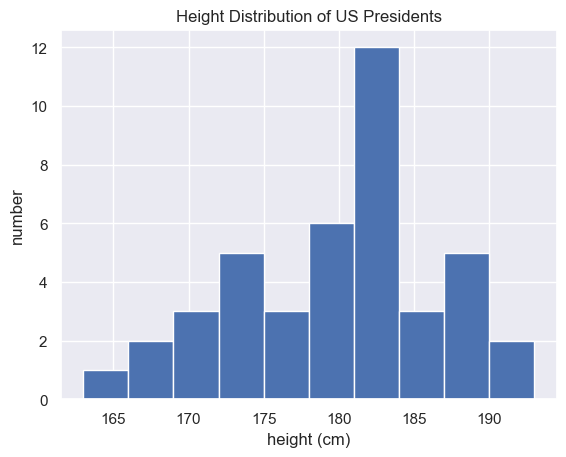

In [30]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

[返回目录](#mulu)

## <font size=5><span id="12.6"> 12.6 数组计算之广播(Broadcasting)</span></font>

NumPy 的通用函数可用于向量化操作，因而去掉了慢速的 Python 循环

另一种向量化操作方法是 NumPy 的*广播*功能

*广播*是一系列将二元通用函数（例如，相加、相减、相乘等）应用于不同尺寸数组的规则。

### 12.6.1 广播介绍

- 回顾：对于同样尺寸的数组，二元操作是对数组元素逐对进行

In [ ]:
import numpy as np

In [24]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

#### 广播的特点

- 广播 允许二元操作对不同尺寸的数组进行
- 例如 可让一个数组加上一个标题

In [ ]:
a + 5

#### 广播的本质

- 上述操作本质是：将值``5``<font color="red">伸展或复制</font>成数组``[5, 5, 5]``，然后与原数组 `a` 相加得到最后结果
- NumPy 广播的好处在于，复制值的操作仅<font color="red">停留在想象中</font>，实际上并没有做
- 可以<font color="red">扩展到更高维情况</font>，例如 一维数组 加 二维数组

In [22]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
a

array([0, 1, 2])

In [47]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

这里，先伸张一维数组 ``a``，向第二维广播，以匹配``M``的维度。

考虑如下更复杂的例子

In [26]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [49]:
a + b   #想一想，结果的shape

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### 示意图

与前述伸张和广播以匹配维度的情况相同，这里

- 向量``a``和``b``都被伸张以匹配一个共同的维度
- 结果都伸张成二维数组。

本例的示意图如下

![Broadcasting Visual](images/chapter12/02.05-broadcasting.png)

浅色盒子代表广播值

再提醒一次：
- 伸张并不在操作过程中发生内存申请

### 10.6.2 广播规则

- 规则1 —— 如果2个数组维数不同，维数少者进行填充<font color="red">（左边引导）</font>
- 规则2 —— 如果2个数组不是按所有的维匹配，具有维度(shape)为1的数组将延展以匹配另一个维度
- 规则3 —— 如果任一维的尺度都不符，也不等于1，错误将发生

考虑以下例子

#### 广播示例 1

二维数组与一维数组相加

In [27]:
M = np.ones((2, 3))
a = np.arange(3)
print('M=',M)
print('a=',a)

M= [[1. 1. 1.]
 [1. 1. 1.]]
a= [0 1 2]


两个数组的维度分别为：

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

由规则 1，数组``a``的维数较小，因此将被伸张填充成

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

由规则 2，两数组的第一维不匹配，因此将维度向这一维填充

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

最终，两数组匹配，维度为``(2, 3)``

In [ ]:
M + a

#### 广播示例2

两个数组的广播

In [28]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print('a=',a)
print('b=',b)

a= [[0]
 [1]
 [2]]
b= [0 1 2]


写下它们的维度

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

规则 1 表明要填充数组``b``

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

同时，规则 2 表明，每一数组都要向另一数组看齐

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

In [ ]:
a + b

In [ ]:
a = np.arange(2).reshape((2, 1))
b = np.arange(3)
print('a=',a)
print('b=',b)
a + b

#### 广播示例3

考虑两数组不兼容的情况

In [29]:
M = np.ones((3, 2))
a = np.arange(3)
print('M=',M)
print('a=',a)

M= [[1. 1.]
 [1. 1.]
 [1. 1.]]
a= [0 1 2]


In [53]:
M.shape, a.shape

((3, 2), (3,))

本例与前例又有不同，矩阵``M``被转置了

会影响结果吗？会影响计算吗？

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

再注意，规则 1告知，要把数组 ``a``配置好

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

规则 2, ``a``的第一维被用来检验匹配矩阵``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

现在，规则 3

- 最后的形状不匹配，因此该两数组不相容

In [30]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

#### 潜在的混淆可能

- 是否可伸张 ``a`` 的右侧维度，而不是左侧维度？
- 但这不是广播的操作方式
- 这种灵活性或许适用于某些特例，但可能会产生歧义
- 如果本义是要右侧填充，应该做的是<font color="red">显式重构数组</font>（使用关键字``np.newaxis``，见[NumPy数组基础]）

In [55]:
a.shape

(3,)

In [56]:
a[:, np.newaxis].shape

(3, 1)

In [57]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

#### 广播的推广

- 运算符 ``+``的广播，可以推广到任一二元*通用函数*

例如，函数``logaddexp(a, b)``用于计算``log(exp(a) + exp(b))``，与初级方法相比，它具有更高的精度

In [ ]:
np.logaddexp?

In [33]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a)
print(b)
np.power(a, b)

[[0]
 [1]
 [2]]
[0 1 2]


array([[1, 0, 0],
       [1, 1, 1],
       [1, 2, 4]])

In [58]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

关于通用函数更多的内容，参看[NumPy 数组计算 —— 通用函数]

### 12.6.3 广播实战

#### 快速化手段

- 使用通用函数 —— 可避免慢速循环
- 广播更进一步扩展这一能力

#### 考虑若干有用的示例

- 中心化数组

假设有10组观察值，每组含三个数，按标准数组表示方式，将它们存放在一$10 \times 3$ 的数组中

In [36]:
X = np.random.random((10, 3))
X

array([[0.78217409, 0.89641523, 0.39818316],
       [0.2849367 , 0.11793169, 0.38496266],
       [0.13634511, 0.28581497, 0.02839205],
       [0.05142852, 0.51375603, 0.88619838],
       [0.49706118, 0.34923063, 0.61331303],
       [0.04160493, 0.98676399, 0.61133363],
       [0.69622478, 0.23828996, 0.9860547 ],
       [0.11311519, 0.18584133, 0.93768634],
       [0.26668654, 0.39116397, 0.46455161],
       [0.06705607, 0.20517083, 0.3343542 ]])

计算均值通过 ``mean`` 聚合函数（沿第一维）进行

In [37]:
Xmean = X.mean(axis=0)
Xmean

array([0.29366331, 0.41703786, 0.56450298])

现在通过减去均值得到中心化的数组 (此即广播操作):

In [38]:
X_centered = X - Xmean
X_centered

array([[ 0.48851078,  0.47937737, -0.16631982],
       [-0.00872661, -0.29910618, -0.17954032],
       [-0.1573182 , -0.13122289, -0.53611092],
       [-0.2422348 ,  0.09671817,  0.3216954 ],
       [ 0.20339786, -0.06780724,  0.04881005],
       [-0.25205838,  0.56972613,  0.04683066],
       [ 0.40256147, -0.1787479 ,  0.42155172],
       [-0.18054812, -0.23119653,  0.37318336],
       [-0.02697677, -0.02587389, -0.09995136],
       [-0.22660724, -0.21186703, -0.23014878]])

检查中心化的数组，其均值接近零

In [39]:
X_centered.mean(0)

array([ 1.11022302e-17, -3.33066907e-17,  7.77156117e-17])

### 12.6.4 二维函数绘图

广播特别适合给二维函数绘图。

设有函数 $z = f(x, y)$，利用广播来计算绘图网格

In [61]:
# x 和 y 数组含从 0 到 5 的 50 个间隔点
npoint = 10000
x = np.linspace(0, 5, npoint)
y = np.linspace(0, 5, npoint)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

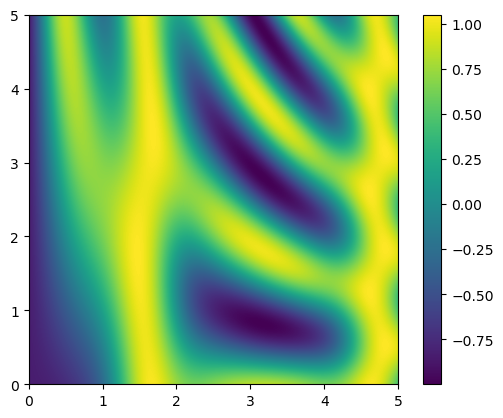

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

In [ ]:
## 试着画一下刚刚的象棋棋盘

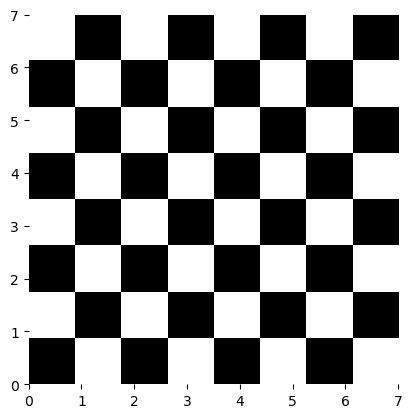

In [63]:
x = np.linspace(0,7,8,dtype=int)
y = np.linspace(0,7,8,dtype=int)[:, np.newaxis]
z = (x+y)%2
plt.imshow(z, origin='lower', extent=[0, 7, 0, 7],
           cmap='gray')  # viridis   gray gray_r seismic
#plt.colorbar();
plt.axis('on')  
plt.box(0)

In [ ]:
plt.imshow?

[返回目录](#mulu)

## <font size=5><span id="12.7"> 12.7 布尔数组和掩码</span></font>
本节讨论布尔掩码的使用

### 12.7.1 示例：雨天计数

现有Seattle市，2014年，每天降雨量的系列数据

使用Pandas导入数据，详见[Pandas 介绍](http://pandas.pydata.org/)。

In [35]:
!type data\Seattle2014.csv

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140106,3,0,0,78,-5,26,210,210,112,125,1,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140107,122,0,0,83,50,16,160,150,45,54,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT

In [65]:
import numpy as np
import pandas as pd

In [41]:
# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape
print(inches)

[0.         0.16141732 0.05905512 0.         0.         0.01181102
 0.48031496 0.38188976 0.22834646 0.16929134 0.83858268 0.05905512
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01968504 0.         0.
 0.         0.         0.         0.3503937  0.8503937  0.
 0.09055118 0.07874016 0.         0.         0.         0.
 0.         0.         0.2007874  0.01968504 0.72047244 0.66929134
 0.18110236 0.07086614 0.37007874 0.46062992 1.03937008 0.57086614
 0.5984252  0.03937008 0.11811024 0.11023622 0.0984252  0.24015748
 0.51181102 0.01181102 0.         0.         0.         0.01968504
 0.7519685  0.42125984 0.6496063  1.83858268 0.11811024 0.
 1.27165354 0.16929134 0.74015748 0.         0.         0.01968504
 0.27165354 0.31889764 1.09055118 0.01181102 0.         0.01968504
 0.         0.         0.         0.         0.         0.16141732
 0.14173228 0.01181102 0.87007874 0.5511811  0.         0.
 0.         0.         0.0984252  0.       

#### 观察数据及其柱图

- 数组含有365组值，从2014年元旦到岁末的日降雨数据
- 观察其柱状分布图，该图的绘制由Matplotlib完成

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

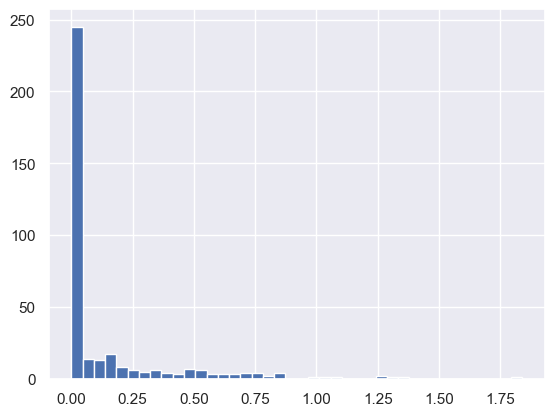

In [68]:
plt.hist(inches, 40);

柱状图给出了数据的分布特征，尽管该城以多雨著称，但图中显示2014年绝大多数天的降雨量都接近零。

仅看出这样还不够，要考虑许多问题，如
- 当年有多少雨天？
- 这些天的平均降雨量是多少？
- 有多少天的降雨量超过半英寸？

#### 挖掘数据

- 立即想到的办法：循环数据，采用计数器统计
- 印象：效率太低（写代码，计算）

#### 提高效率

- 采用NumPy的通用函数
- 另一类通用函数进行数组元素的*比较*

#### 先学习 NumPy 的掩码

### 12.7.2 通用函数中的比较运算符

前面介绍了通用函数，重点关注的是

- 算术运算，如加、减、乘、除、等

NumPy 还实现了<font color="red">比较运算符</font>，如

- ``<`` (小于) 
- ``>`` (大于)
- 其它

这些都是<font color="red">元素级通用函数</font>，它们产生的结果是<font color="red">布尔类型数组</font>。

In [47]:
x = np.array([1, 2, 3, 4, 5])

In [48]:
x < 3  # 小于

array([ True,  True, False, False, False])

In [ ]:
x > 3  # 大于

In [ ]:
x <= 3  # 小于等于

In [ ]:
x != 3  # 不等于

In [ ]:
x == 3  # 等于

逐元素比较

In [ ]:
(2 * x) == (x ** 2)

####  比较运算符对应的通用函数

- 与加减乘除相似，在NumPy中，比较运算符也实现为通用函数

例如， 计算 ``x < 3``, 内部将调用函数 ``np.less(x, 3)``

#### 比较运算符及其通用函数列表

| 运算符	    | 通用函数    | 
|---------------|---------------------| 
|``==``         |``np.equal``         |
|``!=``         |``np.not_equal``     |  
|``<``          |``np.less``          |  
|``<=``         |``np.less_equal``    |  
|``>``          |``np.greater``       |
|``>=``         |``np.greater_equal`` |

#### 适用于任意的数组形状

- 正如算术类通用函数，这些运算符也适用于任意尺寸和形状的数组

考虑一二维数组算例

In [49]:
rng = np.random.RandomState(0)    # 给定随机种子，产生一个随机数生成器
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [50]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### 12.7.3 布尔数组操作

给定一布尔数组，可进行多种操作

In [ ]:
print(x)

In [ ]:
x < 6

#### 计数操作

- 对真值计数，使用``np.count_nonzero``

In [73]:
# 计数有多少小于 6?
np.count_nonzero(x < 6)

8

#### 对指定条件求和

- 使用``np.sum``函数

这里，``False``按``0``对待，``True``按``1``对待:

In [74]:
np.sum(x < 6)

8

使用``sum()``的好处还有：

- NumPy 聚合函数可沿行进行，也可沿列进行

In [ ]:
# 每行有多少值小于 6 ?
np.sum(x < 6, axis=1)

In [ ]:
x

In [ ]:
#这里，计算出矩阵各行小于 6 的元素个数

#### ``np.any`` 和 ``np.all``

用途

- 快速检查是否有真值
- 或所有元素是否无真值

In [75]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [76]:
# x 中是否有任何值大于 8?
np.any(x > 8)

True

In [77]:
# x 中是否有任何值小于 0?
np.any(x < 0)

False

In [ ]:
# x 中是否所有值小于 10?
np.all(x < 10)

In [ ]:
# x 中是否有所有值等于 6?
np.all(x == 6)

#### 用于特定轴

- ``np.all``和``np.any``也可用在特定轴上

例如

In [78]:
# 对于每行，是否所有值都小于 8 ?
print(x)
np.all(x < 8, axis=1)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


array([ True, False,  True])

第1和第3行的所有元素均小于8，而第2行却不是。

注意：

- Python 有若干内建函数，如``sum()``、``any()``和``all()``
- 在NumPy中也有同样功能的函数
- Python 内建函数用于多维数组会产生不可预测的结果
- 确保对多维数组使用``np.sum()``、``np.any()``和``np.all()``

### 12.7.4 布尔运算符

回到Seattle，关心

- 多少天降雨量小于4英寸且大于1英寸？
- 使用*位逻辑运算符*:``&``、``|``、``^``和``~``

与前相同，NumPy也重载了这些通用函数

In [45]:
np.sum((inches > 0.5) & (inches < 1))   # & 不是&&

29

In [46]:
(inches > 0.5) & (inches < 1)

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,

In [39]:
# np.sum(0.5 < inches < 1)   # & 不是&&

NameError: name 'inches' is not defined

#### 注意

这里，小括号很重要，若省略，将会是

``` python
inches > (0.5 & inches) < 1
```

还可采用等效的逻辑式 *A AND B* and *NOT (NOT A OR NOT B)* 

#### 发现

- 有29天的降雨量介于 0.5 和 1.0 英寸之间

In [80]:
np.sum(~((inches <= 0.5) | (inches >= 1)))  #看这个逻辑表达式

29

#### 逻辑表达式

- 结合比较运算符和逻辑运算符，可以有更多样的逻辑表达式

下表给出按位操作的布尔运算符及其等效通用函数

| 运算符	    | 通用函数    |说明|
|---------------|---------------------|--|
|``&``          |``np.bitwise_and``   |与|
|&#124;         |``np.bitwise_or``    |或|
|``^``          |``np.bitwise_xor``   |或，两个结果一真一假为真，否则为假|
|``~``          |``np.bitwise_not``   |非|

In [ ]:
np.bitwise_xor([True, True, False, False], [True, False, True, False])

In [ ]:
np.bitwise_or([True, True, False, False], [True, False, True, False])

采用这些工具，我们可能回答前面关于 Seattle 天气数据的问题。

In [ ]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

###  12.7.5 布尔掩码数组和掩码操作

- 前面介绍了利用聚合函数直接运算布尔数组
- 更强大的模式是利用掩码来选取特定的数据子集

In [81]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

按给定条件，得到一布尔数组

In [82]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

#### 掩码操作

现在，从上述布尔数组选取值，这就是所谓 <font color="red">*掩码* 操作</font>

In [83]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

#### 注意

- 返回的是一维数组，每个元素对应的掩码都是 ``True``

然后，即可进行需要的计算

In [52]:
rainy

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,

In [51]:
# construct a mask of all rainy days
rainy = (inches > 0)
#print(rainy)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


#### 对 Seattle 天气量化判断的基本方法

- 布尔操作
- 掩码运算
- 聚合函数

快速回答了这类问题

### 12.7.6 进一步的讨论（自学）

- 应该使用关键字 and/or 还是运算符 &/|

#### 容易混淆的问题是

- 关键字and/or 和运算符 &/|有什么区别？
- 何时该使用哪一类？

#### 区别
- ``and`` 和 ``or`` 针对整个对象
- ``&`` 和 ``|`` 针对 *对象的位*

#### 注意

- 使用``and`` 或 ``or``时，要求 Python 把对象<font color="red">当成单一的布尔实体来处理</font>
- 在 Python, 所有的非零值被当成 True

In [ ]:
bool(42), bool(0)

In [ ]:
bool(42 and 0)

In [ ]:
bool(42 or 0)

对整数使用``&`` 和 ``|``时, 是按位来操作

In [ ]:
bin(42)

In [ ]:
bin(59)

In [ ]:
bin(42 & 59)


In [ ]:
bin(42 | 59)

In [ ]:
bin(42 ^ 59)

注意：对相应的位进行比较，得到结果

In [ ]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

对数组使用``or``，即判别整个数组对象的真假

In [ ]:
#A or B
np.logical_or(A,B)

类似地，对数组进行布尔运算，必须采用 ``|`` 或 ``&``，而不是``or`` 或 ``and``:

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

不能如下式用``and``

In [ ]:
(x > 4) and (x < 8)

### 小结

- ``and`` 和 ``or`` 对单个对象进行操作
- ``&`` 和 ``|`` 对多项内容进行布尔运算操作

而对 NumPy 数组，后者几乎总是期望的操作。

[返回目录](#mulu)

## <font size=5><span id="12.8"> 12.8 花式索引（fancy indexing）</span></font>

### 12.8.1 引言

#### 回顾 —— 访问和修改数组元素的方法

- 使用下标（如 ``arr[0]``）
- 使用切片（如 ``arr[:5]``）
- 布尔掩码（如 ``arr[arr > 0]``)

#### 引入 —— 花式索引

- 用于快速访问和修改数组的复杂子集

### 12.8.2 花式索引的概念

- 传递<font color="red">索引数组</font>，以实现访问多个数组元素

In [55]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


#### 问题

- 考虑访问以下三个元素

In [56]:
[x[3], x[7], x[2]]

[71, 86, 14]

#### 更有效率的处理

- 传递索引数组，获得同样结果

In [57]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

#### 非拷贝视

In [52]:
x[ind]=[-1, -2, -3]
x

array([51, 92, -3, -1, 60, 20, 82, -2, 74, 74])

#### 结果维度

使用花式索引时

- 结果的维度与索引数组的维度相同
- 结果的维度不同于原数组的维度

In [58]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [88]:
ind = np.array([[3, 7],
                [4, 5]])  #理解一下
x[ind]

array([[-1, -2],
       [60, 20]])

In [89]:
x

array([51, 92, -3, -1, 60, 20, 82, -2, 74, 74])

#### 花式索引用于多维数组

In [54]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

同于标准索引方式

- 第一下标代表行号
- 第二下标表示列号

In [59]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

####  注意要点

- 上例，首元素是 ``X[0, 2]``、次元素是 ``X[1, 1]``、再次元素是 ``X[2, 3]``
- 花式索引的配对方式服从广播规则
- 如果两个索引数组分别是行向量和列向量，结果将是二维数组

In [92]:
X[row[:, np.newaxis], col]  #注意这里插入了newaxis

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里，行与列匹配，按前述广播操作方式

### 花式索引的返回结果反映了

- 下标的广播维度
- 非原数组的维度

### 12.8.3 花式索引结合

- 更强的操作方式

In [55]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### 花式和简式索引相结合

In [56]:
X[2, [2, 0, 1]]

array([10,  8,  9])

#### 花式索引和切片相结合

In [64]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

#### 花式索引和掩码相结合

In [60]:
row

array([0, 1, 2])

In [97]:
mask = np.array([1, 0, 1, 0], dtype=bool) #0 2列保留  ； 1 3舍弃
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [ ]:
row[:, np.newaxis]

结合上述各索引选项，将产生更灵活的访问修改数组元素方式

### 12.8.4 示例 —— 选取随机点

- 从矩阵中选取若干行的子集合

例如，某 $N\times D$ 矩阵代表 $N$ 个 $D$ 维点，下例即给出服从二维正态分布的多个点

In [98]:
import numpy as np
    
mean = [0, 0]
cov = [[1, 3.5],
       [3.5, 16]]   #改变参数看一看
X = np.random.multivariate_normal(mean, cov, 1000)
X.shape

(1000, 2)

#### 绘制散点图

- 采用绘图工具 Matplotlib, 将这些点可视化为散点图

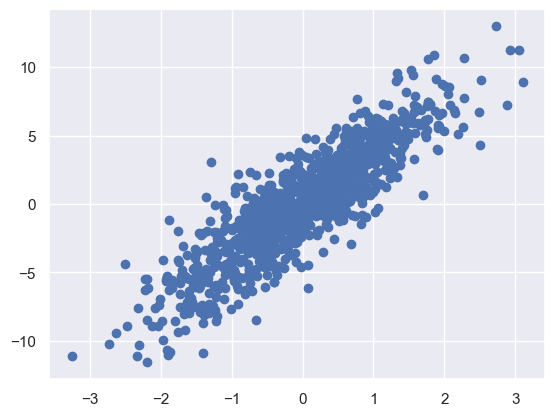

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()  # 设置绘图风格

plt.scatter(X[:, 0], X[:, 1]);
plt.show()

#### 采用花式索引选取20个点

- 选取20个非重复的随机索引
- 用选取的这些索引再从原数组中做部分选取

In [100]:
indices = np.random.choice(X.shape[0], 20, replace=False)  # 随机选择20个
indices

array([587,  83, 192, 215, 247, 756, 171, 691, 570, 859, 428, 875, 340,
       450, 796, 226, 218, 598, 594, 128])

In [101]:
selection = X[indices]  # 采用花式索引
selection.shape

(20, 2)

In [102]:
selection

array([[-2.18144276, -6.13134755],
       [-0.53264181,  0.76746338],
       [-0.91126851,  2.18551634],
       [ 0.04512265, -0.75671581],
       [ 0.07886324, -0.48717615],
       [ 0.68931804,  0.68498597],
       [-1.10117544, -4.59364973],
       [-0.27718086, -1.02322486],
       [-0.46788068, -0.79947112],
       [ 0.98826345,  4.64839752],
       [-0.42034689, -4.34841461],
       [-0.89878324, -1.73980933],
       [ 0.9353832 ,  1.90570604],
       [ 0.93080617,  4.36467308],
       [ 0.62935556,  4.67778684],
       [ 2.2802506 , 10.67776169],
       [ 0.39900545,  1.56155248],
       [ 1.767935  ,  6.18669542],
       [ 0.79270182,  2.32453296],
       [ 0.58871876, -0.06339427]])

- 观察所选取的点
- 二次绘制散点图（所选点绘制成更大的圆）

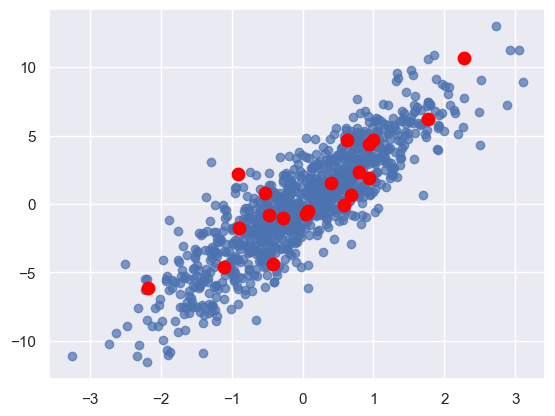

In [103]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='red', s=80);

#### 利用花式索引修改值

花式索引可用于

- 访问数组的部分
- 修改数组的部分

如下例，利用索引数组修改原数组中的元素值

In [66]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


#### 使用赋值类运算符

In [67]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


#### *注意重复索引

- 可能导致不可预测的结果，例如

In [68]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]  
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### *问题 —— 4在哪儿？

- 先赋值``x[0] = 4``
- 接着赋值``x[0] = 6``

结果当然是``x[0]``的值为 6

再考虑下例

In [ ]:
print(x)

In [80]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
#想一下

In [82]:
print(x)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


考虑到索引的重复次数，容易认为``x[3]``的值为 2，以及``x[4]``的值为 3，怎么得到这个结果？

概念上看，``x[i] += 1``表示``x[i] = x[i] + 1``，即，先算出``x[i] + 1``，然后赋给相应的元素。 ???理解一下

因此，这里<font color="red">并不是增值多次，而是赋值多次</font>，当然就导致了不同于直觉的结果。

如果，确实想实现重复运算操作，该怎么办呢？

- 使用通用函数中的``at()``方法（要求NumPy 1.8版本）
- 然后，执行...

###  12.8.5  `NumPy` 通用函数的 ``at()`` 方法


- 对操作数组 `a`，在索引数组 `indices` 处的元素，按给定的数组值 `b` ，进行通用函数的操作


- 语法
```python
>>> np.ufunc.at(a, indices, b=None)
```


- 参数
    - a —— 操作数组
    - indices —— 索引数组
    - b —— 第二操作数组，和 indices 遵守广播规则

#### 例 求和

In [104]:
a = np.array([1, 2, 3, 4])
np.add.at(a, [0, 1, 2, 2], 1)  # 注意广播
print(a)

[2 3 5 4]


#### 例 求差

In [105]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2])
np.subtract.at(a, [0, 1], b)  # 同维、同维度
print(a)

[0 0 3 4]


#### 例 取反

In [83]:
a = np.array([1, 2, 3, 4])
np.negative.at(a, [0, 1])  # 取反
print(a)

[-1 -2  3  4]


#### 例 求正弦

In [ ]:
a = np.linspace(0,180,5)
print(a)

a *= np.pi/180

np.sin.at(a, [1,2,3])
print(a)

### 12.8.6 示例 —— 分箱数据(Binning Data)

有效地数据分箱以便创建柱图

例如，假设已有1000个值，现欲快速了解这些数据各自落在哪一个箱中

可以使用``ufunc.at``

In [106]:
import numpy as np
np.random.seed(42)
x = np.random.randn(100000)
#print(x)
#print(x.shape)

# compute a histogram by hand
bins = np.linspace(-5, 5, 81)
#print(bins)
counts = np.zeros_like(bins)  #返回一个与bins一样大小维度的0数组
#print(bins)

# find the appropriate bin for each x
# 查找一个合适的位置，将元素插入已排好序的一维数组中，并且保持数组元素的顺序不被打乱。
i = np.searchsorted(bins, x)   #将x插入原有序数组bins，并返回插入元素的索引值
print(i)

# add 1 to each of these bins
np.add.at(counts, i, 1)

[44 39 46 ... 44 39 41]


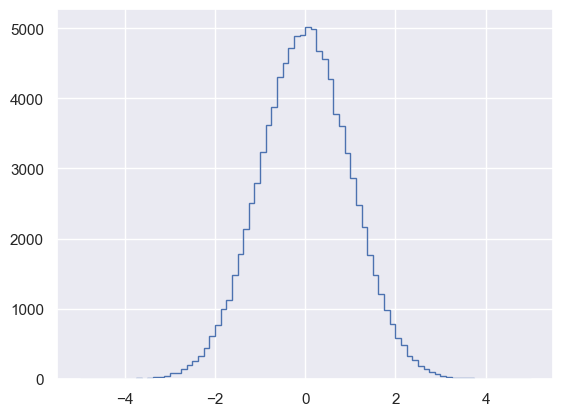

In [107]:
plt.hist(x, bins, histtype='step');

现在，计数代表了每一箱中的点数，换一句话，柱图

In [108]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
9.75 ms ± 554 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom routine:
15.2 ms ± 438 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


我们的单行算法几倍快于NumPy的优化算法！

这是怎么回事？

深入剖析``np.histogram``源代码(使用``np.histogram??``)，发现原来相比我们所用的简单搜索计数方法，它涉及更多因素，这是因为NumPy设计的算法更灵活，尤其是当数据量变大时其表现将变得更好。

In [ ]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

[返回目录](#mulu)

## <font size=5><span id="12.9"> 12.9 排序</span></font>

### 12.9.1 众多排序算法

- 插入排序
- 选择排序
- 合并排序
- 快速排序
- 冒泡排序
- 其它许多

如下，用几行Python代码实现*选择排序*

In [109]:
import numpy as np

In [110]:
def selection_sort(x):  # 这个排序思想是什么？
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])   #np.argmin返回最小值的下标
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [ ]:
np.argmin??

In [111]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)
x

array([1, 2, 3, 4, 5])

选择排序适用于简单问题，对于大数组的运算速度太慢

对于 $N$ 个元素的列表，选择排序算法的计算量平均约为 $\mathcal{O}[N^2]$，如果元素增加一倍，计算时间将乘以4。

不管怎样，选择排序算法也远好于bogo排序方法。

看看bogo算法

In [112]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):  #什么意思？思考一下
        print(x)
        np.random.shuffle(x)
    print(x)
    return x

In [113]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

[2 1 4 3 5]
[4 2 5 3 1]
[5 1 4 2 3]
[4 1 5 3 2]
[5 3 4 2 1]
[5 2 3 4 1]
[5 1 4 3 2]
[4 3 5 2 1]
[4 3 2 1 5]
[1 4 5 2 3]
[5 1 3 2 4]
[2 1 4 5 3]
[4 1 5 2 3]
[4 1 3 2 5]
[1 5 3 4 2]
[2 3 1 4 5]
[4 5 2 1 3]
[3 1 5 2 4]
[1 5 4 2 3]
[1 5 2 4 3]
[1 2 5 4 3]
[4 1 2 5 3]
[3 5 2 1 4]
[3 2 5 1 4]
[3 5 4 2 1]
[2 3 4 1 5]
[1 2 4 5 3]
[3 2 4 1 5]
[5 4 3 1 2]
[5 4 2 3 1]
[3 1 2 5 4]
[2 1 3 4 5]
[3 5 2 4 1]
[1 2 5 3 4]
[4 5 3 2 1]
[5 2 1 3 4]
[2 3 1 5 4]
[5 1 2 3 4]
[2 5 4 1 3]
[1 2 5 4 3]
[2 3 1 5 4]
[1 2 4 3 5]
[2 3 4 1 5]
[3 1 5 4 2]
[2 4 3 5 1]
[2 4 5 3 1]
[2 3 5 1 4]
[3 4 5 1 2]
[4 5 3 1 2]
[4 3 5 2 1]
[5 3 4 1 2]
[5 4 2 1 3]
[3 4 2 5 1]
[5 1 3 4 2]
[2 3 5 4 1]
[2 3 1 5 4]
[5 1 3 2 4]
[4 3 1 5 2]
[1 3 2 4 5]
[2 1 3 5 4]
[3 1 4 2 5]
[2 3 5 1 4]
[1 5 3 4 2]
[1 3 4 2 5]
[5 1 4 2 3]
[2 3 5 4 1]
[3 1 2 5 4]
[5 2 4 3 1]
[2 3 1 5 4]
[3 2 4 1 5]
[2 3 4 1 5]
[3 4 5 2 1]
[5 3 1 2 4]
[2 4 1 5 3]
[1 4 2 5 3]
[1 4 3 5 2]
[5 1 3 2 4]
[2 4 3 5 1]
[2 1 3 5 4]
[2 5 4 1 3]
[4 2 5 1 3]
[5 3 2 1 4]
[3 2 1 4 5]
[2 5

array([1, 2, 3, 4, 5])

- 上述方法的平均计算量为 $\mathcal{O}[N \times N!]$
- 因此，这一排序方法从未被用于实际计算

### 12.9.2 NumPy 中的快速排序算法: ``np.sort`` 和 ``np.argsort``

- Python 有内建的``sort``和``sorted``函数用于对列表排序
- NumPy 也有效率更高的``np.sort``函数


缺省时，``np.sort``使用 $\mathcal{O}[N\log N]$阶的*快速排序算法*，尽管*合并排序法*和*堆排序法*也可用，对于绝大多数情形，缺省的快速排序算法完全够用了

返回排好序的结果，又不修改输入数组，可以使用``np.sort``

In [114]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x), x

(array([1, 2, 3, 4, 5]), array([2, 1, 4, 3, 5]))

如果想就地（in-place）排序一数组，可采用数组的``sort``方法

In [ ]:
x.sort()
print(x)

相应的函数是``argsort``，它返回的是排好序的元素索引

In [63]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)
x

[1 0 3 2 4]


array([2, 1, 4, 3, 5])

返回的索引列表可用来（通过花式索引）构建排好序的数组

In [116]:
x[i]

array([1, 2, 3, 4, 5])

### 12.9.3 沿行或列排序

NumPy 可沿多维数组特定的行或列进行排序，这要配合使用``axis``参数，例如

In [59]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [60]:
np.sort(X)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [61]:
# sort each column of X
np.sort(X, axis=0)  #按列排序

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [62]:
# sort each row of X
np.sort(X, axis=1) #按行排序

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 记住

- 上述操作<font color="red">将行或列当成独立数组</font>，而且原来行间或列间元素的关系全部失去

### 12.9.4 部分排序：分区(Partitioning)

有时，可能对数组整体排序没有兴趣，但是希望找到数组中*k*个最小的值，NumPy为此提供了``np.partition``函数。

- ``np.partition``函数的参数
    - 一个数组参数
    - 一个数*K*
    - 结果是一个新数组，含*K*个最小的值在分区的左边，余下的右边数组值，以任意序排列

In [86]:
x = np.array([7, 2, 3, 1, 6, 5, 4, 9, 8])
np.partition(x, 3)

array([1, 3, 2, 4, 6, 5, 7, 9, 8])

#### 注意到

- 结果数组中，最前面三个数是三个最小值
- 两个分区中，元素无序排列

类似于排序，也可沿多维数组的任意轴方向进行分区排序

In [122]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [123]:
np.partition(X, 2, axis=1) #每一行前面两个为最小值

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

- 上述结果各行的前2个元素分别是各行最小的2个值
- 如同有``np.argsort``计算排序的索引，也有``np.argpartition``计算分区的索引

### 12.9.4 示例：k-最近邻(k-Nearest Neighbors)

关注：使用``argsort``函数沿多轴寻找集合中每点的最近邻居

先在二维平面内创建10个随机点

同常规，将这10个点放入 $10\times 2$ 数组

In [88]:
import numpy as np
X = np.random.random((10, 2))
X

array([[0.41436391, 0.82611106],
       [0.94773552, 0.74766529],
       [0.01916274, 0.50119162],
       [0.82721569, 0.72099547],
       [0.4055386 , 0.14540016],
       [0.08284878, 0.47357888],
       [0.91212226, 0.11265209],
       [0.92419834, 0.09093654],
       [0.03770295, 0.85304985],
       [0.67678107, 0.48569409]])

- 想了解这些点长成什么样？
- 快速绘制一散点图

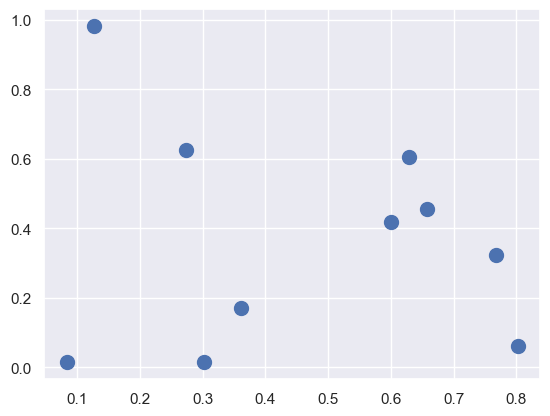

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

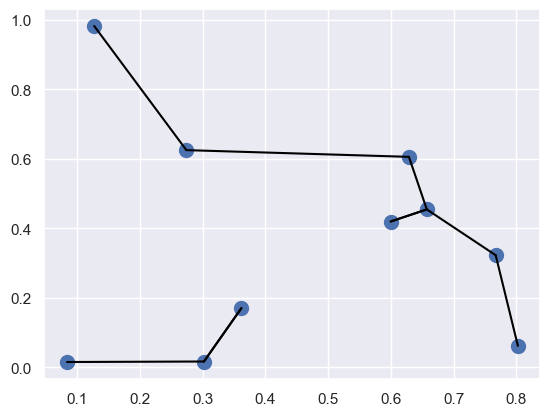

In [129]:
### 传统程序做法(最近的1个点)-方法比较笨哦
import math
nearnode = np.zeros_like(X, dtype=int)
nearnodedist = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    dmin = np.inf
    nearnode[i,0] = i
    for j in range(X.shape[0]):
        if j != i:
            dist = math.sqrt((X[i,0] - X[j,0])**2 + (X[i,1] - X[j,1])**2)
            if dist < dmin:
                nearnode[i,1] = j
                dmin = dist
nearnode
        
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    ni = nearnode[i,0]
    nj = nearnode[i,1]
    plt.plot(*zip(X[ni], X[nj]), color='black')      

#### numpy程序做法
- 计算每对点间的距离
- 点距离的计算要用到勾股定理
    - 使用广播技术
    - 使用聚合函数
- 可以只用单行代码完成上述计算

In [90]:
X[:, np.newaxis, :] - X[np.newaxis, :, :]

array([[[0.41436391, 0.82611106],
        [0.94773552, 0.74766529],
        [0.01916274, 0.50119162],
        [0.82721569, 0.72099547],
        [0.4055386 , 0.14540016],
        [0.08284878, 0.47357888],
        [0.91212226, 0.11265209],
        [0.92419834, 0.09093654],
        [0.03770295, 0.85304985],
        [0.67678107, 0.48569409]]])

In [131]:
X[:, np.newaxis, :].shape, X.shape

((10, 1, 2), (10, 2))

In [92]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq.shape

(10, 10)

- 上述操作十分紧凑，如果不熟悉NumPy的广播规则，有可能会感到困惑
- 如果遇到上述代码，也可不采用紧凑代码，而是分步骤计算

In [133]:
# 对于每一对点，获取坐标差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]  #思考一下，什么含义呢
differences.shape

(10, 10, 2)

In [134]:
differences

array([[[ 0.        ,  0.        ],
        [-0.20278718,  0.35772282],
        [ 0.47239615, -0.56254795],
        [-0.02915166, -0.18609203],
        [-0.16740636,  0.096899  ],
        [-0.05761324, -0.03486605],
        [ 0.2378723 ,  0.2492775 ],
        [ 0.5157607 ,  0.40416066],
        [ 0.29751809,  0.40271995],
        [ 0.32552708, -0.20544215]],

       [[ 0.20278718, -0.35772282],
        [ 0.        ,  0.        ],
        [ 0.67518332, -0.92027077],
        [ 0.17363552, -0.54381485],
        [ 0.03538082, -0.26082382],
        [ 0.14517394, -0.39258887],
        [ 0.44065948, -0.10844532],
        [ 0.71854788,  0.04643785],
        [ 0.50030526,  0.04499713],
        [ 0.52831426, -0.56316497]],

       [[-0.47239615,  0.56254795],
        [-0.67518332,  0.92027077],
        [ 0.        ,  0.        ],
        [-0.50154781,  0.37645591],
        [-0.63980251,  0.65944695],
        [-0.53000939,  0.5276819 ],
        [-0.23452385,  0.81182545],
        [ 0.04336455,  0

In [135]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [136]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(axis=2)
dist_sq

array([[0.        , 0.16908825, 0.53961831, 0.03548006, 0.03741431,
        0.00453493, 0.1187225 , 0.42935494, 0.25070037, 0.14817436],
       [0.16908825, 0.        , 1.30277081, 0.32588389, 0.06928087,
        0.17520149, 0.20594116, 0.51846752, 0.2523301 , 0.59627074],
       [0.53961831, 1.30277081, 0.        , 0.39326926, 0.84421752,
        0.55935814, 0.71406199, 0.93640603, 0.96232445, 0.14909507],
       [0.03548006, 0.32588389, 0.39326926, 0.        , 0.09919829,
        0.02367936, 0.26084843, 0.64532773, 0.45341268, 0.12617143],
       [0.03741431, 0.06928087, 0.84421752, 0.09919829, 0.        ,
        0.02941656, 0.18747   , 0.56112696, 0.30968119, 0.33439355],
       [0.00453493, 0.17520149, 0.55935814, 0.02367936, 0.02941656,
        0.        , 0.16804926, 0.52150213, 0.31759977, 0.17589271],
       [0.1187225 , 0.20594116, 0.71406199, 0.26084843, 0.18747   ,
        0.16804926, 0.        , 0.10121076, 0.02710221, 0.21445332],
       [0.42935494, 0.51846752, 0.9364060

#### 进行复查

- 矩阵对角元素应该全为零（点到自身的距离）

In [137]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

检查后！

- 使用``np.argsort``对每行排序
- 最左边的列将给出最近邻的索引

In [138]:
nearest = np.argsort(dist_sq, axis=1)  #按照行排序，由小到大，并输出序号
print(nearest)

[[0 5 3 4 6 9 1 8 7 2]
 [1 4 0 5 6 8 3 7 9 2]
 [2 9 3 0 5 6 4 7 8 1]
 [3 5 0 4 9 6 1 2 8 7]
 [4 5 0 1 3 6 8 9 7 2]
 [5 0 3 4 6 1 9 8 7 2]
 [6 8 7 0 5 4 1 9 3 2]
 [7 8 6 9 0 1 5 4 3 2]
 [8 6 7 0 1 4 5 9 3 2]
 [9 3 0 2 5 6 4 8 7 1]]


#### 注意到

- 第一列依次给出了0到9，这是因为每个点最近的邻居是自己
- 如果使用完全排序，我们就做了多余的工作
- 如果只是对最近的 $k$ 邻居有兴趣，需要做的是对每行分区，并得到最小的 $k+1$ 个平方距离
- 使用``np.argpartition``函数
    - 在快排算法中，有一个典型的操作：partition。这个操作指：根据一个数值x，把数组中的元素划分成两半，使得index前面的元素都不大于x，index后面的元素都不小于x。
    - numpy中的argpartition()函数就是起的这个作用。对于传入的数组a，先用O(n)复杂度求出第k大的数字，然后利用这个第k大的数字将数组a划分成两半。
    - 此函数不对原数组进行操作，它只返回分区之后的下标。一般numpy中以arg开头的函数都是返回下标而不改变原数组。

In [139]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition #前面3个

array([[3, 0, 5, 4, 1, 2, 6, 7, 8, 9],
       [1, 4, 0, 5, 6, 8, 3, 7, 2, 9],
       [3, 9, 2, 0, 1, 5, 6, 7, 8, 4],
       [3, 0, 5, 4, 1, 2, 6, 7, 8, 9],
       [5, 4, 0, 1, 3, 6, 2, 7, 8, 9],
       [3, 0, 5, 4, 1, 2, 6, 7, 8, 9],
       [6, 8, 7, 0, 5, 4, 1, 3, 2, 9],
       [8, 7, 6, 9, 0, 5, 1, 3, 2, 4],
       [8, 6, 7, 0, 1, 4, 5, 3, 2, 9],
       [3, 9, 0, 2, 5, 6, 1, 7, 8, 4]], dtype=int64)

#### 可视化邻居网络

- 画出所有点
- 画出各点最近的2个邻居及连线

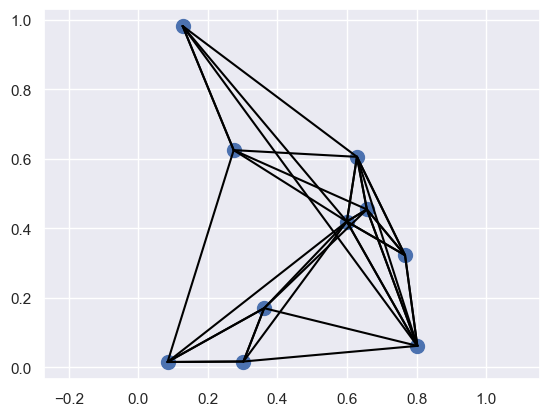

In [140]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 4

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')
        plt.axis('equal')
        ##plt.plot(X[j], X[i], color = 'black')

#### 观察上图

- 每个点都有若干条线连到它最近的邻居

初看发现

- 有些点的连线不止两条，这是合理的，因为即使点A是点B的近邻，并不一定点B是点A的近邻

广播和行排序与循环相比，看起来并不直观，但却是非常有效率的操作方式

如果进行人工循环，将会降低算法的效率

最后，如果进行非常大量的最近邻居搜索，有3种逼近方法，能达到$\mathcal{O}[N\log N]$甚至更好的阶次，而不是brute-force算法的$\mathcal{O}[N^2]$阶，例如 KD-Tree，在[Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html)中实现。

[返回目录](#mulu)

## <font size=5><span id="12.10"> 12.10 NumPy的结构化数据</span></font>

### 12.10.1 引言

- 问题 —— NumPy 处理结构化数据（混合、异质）

    - 结构化数组
    - 记录数组


- 参考 —— Pandas 数据

    - Dataframe
    - TimeSeries

In [ ]:
import numpy as np

### 12.10.2  实例 —— 关于人的多种类数据
- 属性
    - 姓名
    - 年龄
    - 体重


- 创建数组
    - 可采用三个不同的数组

In [94]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

#### 评价

- 上述方式 —— 笨拙，三个数组缺少关联
- 改进方式 —— 用一个结构存贮所有数据

#### NumPy 提供的结构化类型

- 专门用于复合型数据

#### 注意下例中的 ``dtype``

In [ ]:
x = np.zeros(4, dtype=int)
x

#### 使用复合数据类型

- 创建结构化数组
- 注意 zeros 函数的作用

In [93]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print("data.dtype\n", data.dtype)
print("data\n",data)

data.dtype
 [('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]
data
 [('', 0, 0.) ('', 0, 0.) ('', 0, 0.) ('', 0, 0.)]


#### 说明 —— 数据结构

- ``'U10'`` 指“最大长度10的 Unicode 字符串”
- ``'i4'`` 指“4字节（即32位）整数”
- ``'f8'`` 指“8字节（即64位）浮点数”

现在创建了一空容器数组，可以用列表来填充数组

In [95]:
data['name'] = name
data['age'] = age
data['weight'] = weight

print("data\n", data)

data
 [('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [96]:
data.shape

(4,)

#### 复合之后

- 数据现在整合在了一起
- 结构化数组使得可以通过索引或名称来引用元素值

In [97]:
# 获得所有名称
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [98]:
# 获得首条数据(记录)
data[0]

('Alice', 25, 55.)

In [99]:
# 获得末行名称
data[-1]['name']

'Doug'

#### 布尔掩码 —— 更复杂的操作

- 如过滤等

In [100]:
# 获得年龄小于 30 的人名
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

### 12.10.3 与 Pandas 相结合

- 考虑使用 Pandas 包
- Pandas 的 ``Dataframe`` 对象

#### 创建结构化数组

结构化数组的数据类型可有许多方式来指定

- 字典方法(早期用)

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

#### 使用``dtype``关键字

为了表述清楚，数值类型可采用

- Python 类型

或

- NumPy 的``dtype``类型

来指明

In [ ]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_, 10), int, np.float32)})

- 元组列表 —— 指定复合类型

In [ ]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

- 逗号分隔的字符串 —— 指定复合类型

In [ ]:
np.dtype('S10,i4,f8')

### 12.10.4 数据类型定义的原则

缩短了的字符格式代码容易引起困惑，不过总有一些原则遵循

- 第一个（可选）字符是``<``或``>``，分别表示"little endian"或"big endian"
- 下一个字符指定数据类型：字符、字节、整型、浮点型等（见下表）
- 最后一个（或多个）字符表示对象占用的字节数

| 字符        | 描述           | 示例                             |
| ---------        | -----------           | -------                             | 
| ``'b'``          | Byte                  | ``np.dtype('b')``                   |
| ``'i'``          | Signed integer        | ``np.dtype('i4') == np.int32``      |
| ``'u'``          | Unsigned integer      | ``np.dtype('u1') == np.uint8``      |
| ``'f'``          | Floating point        | ``np.dtype('f8') == np.int64``      |
| ``'c'``          | Complex floating point| ``np.dtype('c16') == np.complex128``|
| ``'S'``, ``'a'`` | String                | ``np.dtype('S5')``                  |
| ``'U'``          | Unicode string        | ``np.dtype('U') == np.str_``        |
| ``'V'``          | Raw data (void)       | ``np.dtype('V') == np.void``        |

### 12.10.5 更高级的复合类型

- 有可能定义更高级的复合类型，如某复合类型的每个元素是一个数组或矩阵

如下例，创建一个带``mat``组件由$3\times 3$浮点矩阵构成的数据类型

In [101]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))]) #id  mat两个数据
X = np.zeros(2, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
tp

In [ ]:
X

#### ``X``数组每一元素的组成成份

- ``id``，8位整型
- ``mat``，$3\times 3$ 矩阵

#### 为什么这样定义？

- NumPy 的 ``dtype`` 直接映射成 C 语言结构定义
- 便于通过恰当编写的 C 程序直接访问

[返回目录](#mulu)